# Import libraries

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [135]:
df = pd.read_csv('../Data/UNSW-NB15/UNSW_NB15_training-set.csv')
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [136]:
# 1. Basic Info
# ======================
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nDataset Info:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

Shape of dataset: (82332, 45)

Columns:
 ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 

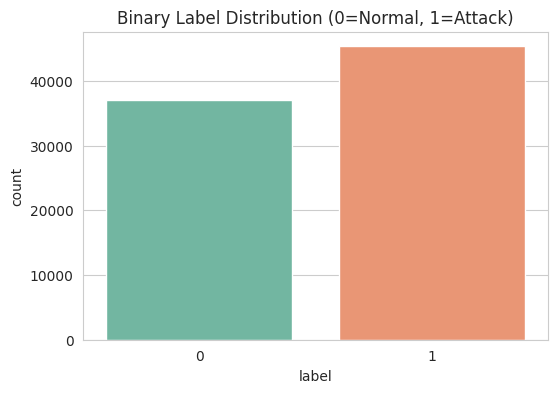

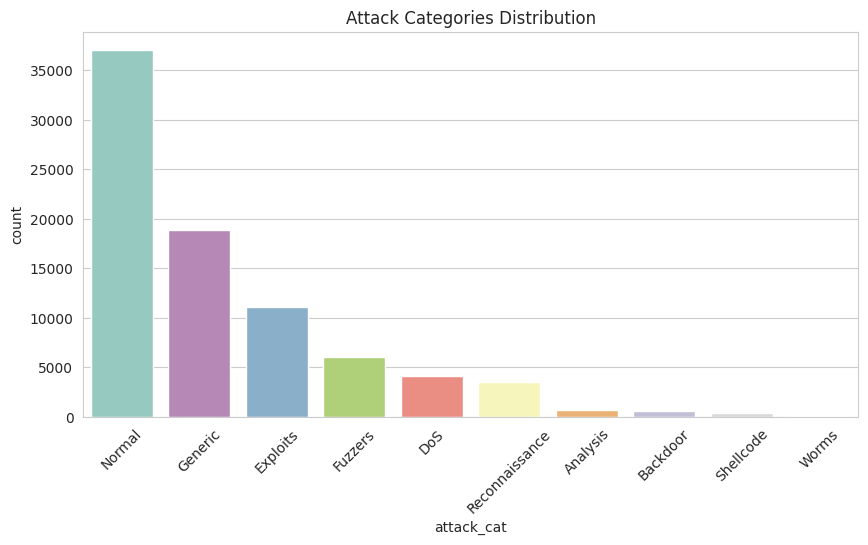

In [137]:
# 2. Label Distributions
# ======================
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette="Set2", legend=False, hue='label')
plt.title("Binary Label Distribution (0=Normal, 1=Attack)")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='attack_cat', data=df, order=df['attack_cat'].value_counts().index, palette="Set3", legend=False, hue='attack_cat')
plt.xticks(rotation=45)
plt.title("Attack Categories Distribution")
plt.show()


Numerical Features:
 ['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label']

Descriptive Statistics:
                      count          mean           std   min           25%  \
id                 82332.0  4.116650e+04  2.376735e+04   1.0  20583.750000   
dur                82332.0  1.006756e+00  4.710444e+00   0.0      0.000008   
spkts              82332.0  1.866647e+01  1.339164e+02   1.0      2.000000   
dpkts              82332.0  1.754594e+01  1.155741e+02   0.0      0.000000   
sbytes             82332.0  7.993908e+03  1.716423e+05  24.0    114.000000   
dbytes    

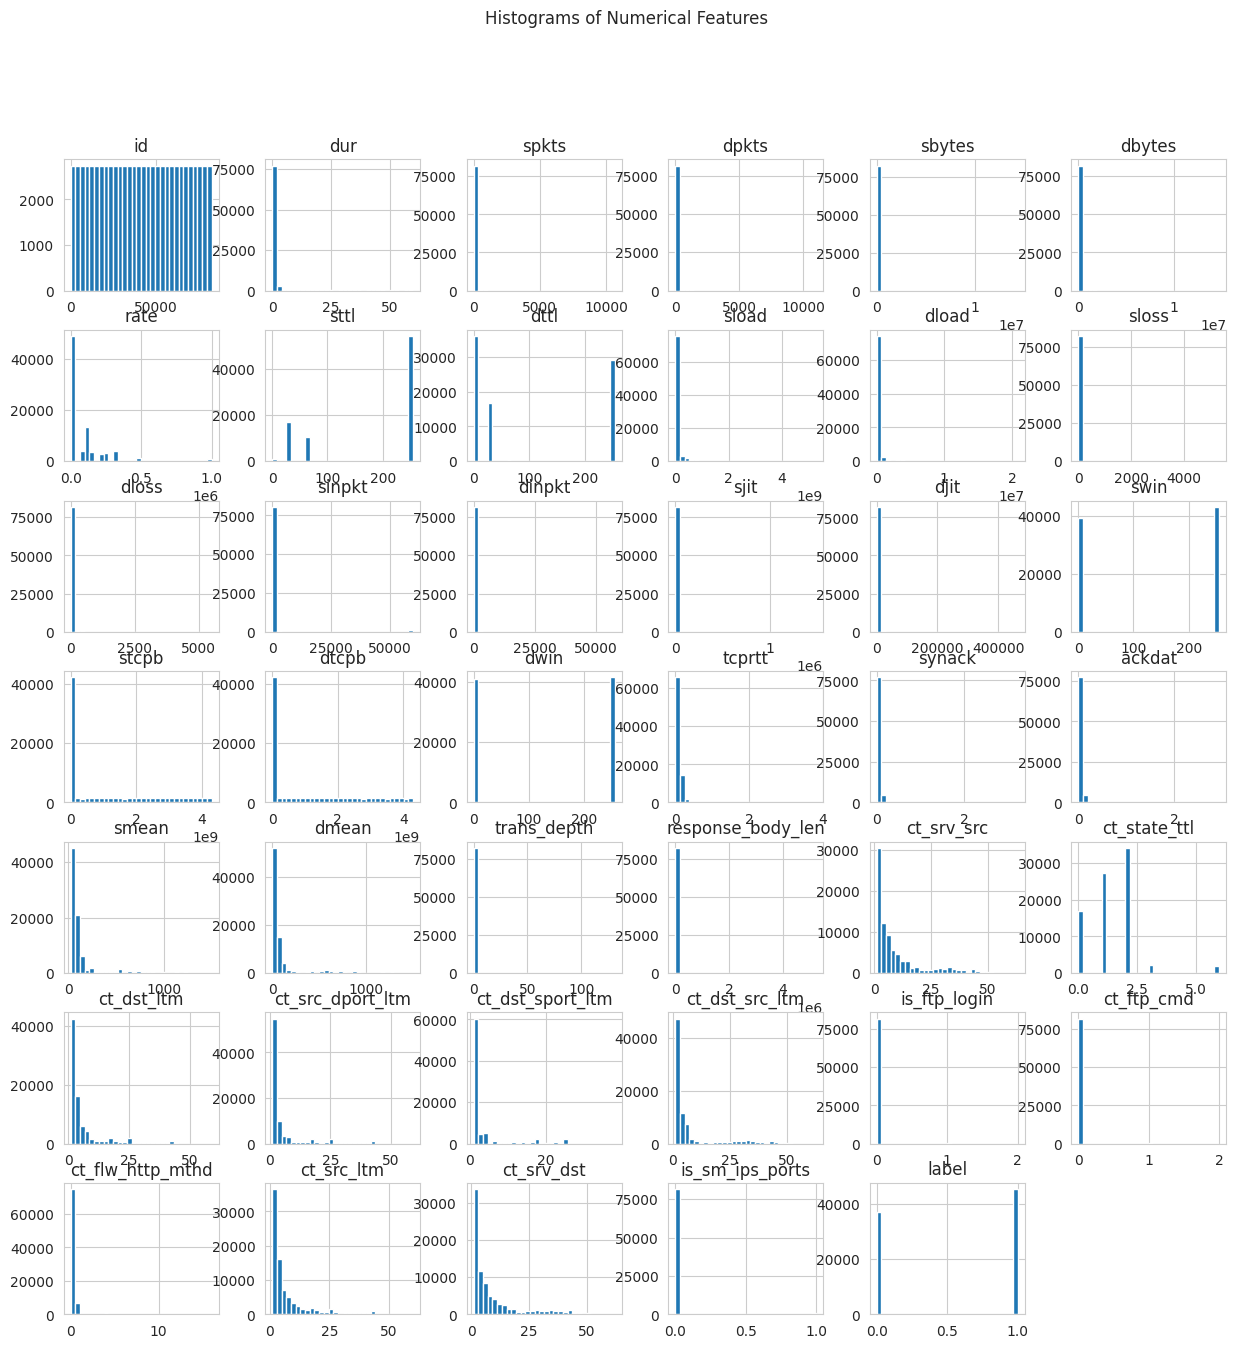

In [138]:
# 3. Numerical Features Stats
# ======================
num_cols = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical Features:\n", num_cols.tolist())
print("\nDescriptive Statistics:\n", df[num_cols].describe().T)

# Plot distributions of a few key numeric features
df[num_cols].hist(figsize=(15,15), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [139]:
# 4. Categorical Features
# ======================
cat_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Features:\n", cat_cols.tolist())

for col in cat_cols:
    print(f"\nTop values in {col}:\n", df[col].value_counts().head(10))



Categorical Features:
 ['proto', 'service', 'state', 'attack_cat']

Top values in proto:
 proto
tcp     43095
udp     29418
unas     3515
arp       987
ospf      676
sctp      324
any        96
gre        88
rsvp       64
ipv6       61
Name: count, dtype: int64

Top values in service:
 service
-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
Name: count, dtype: int64

Top values in state:
 state
FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: count, dtype: int64

Top values in attack_cat:
 attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


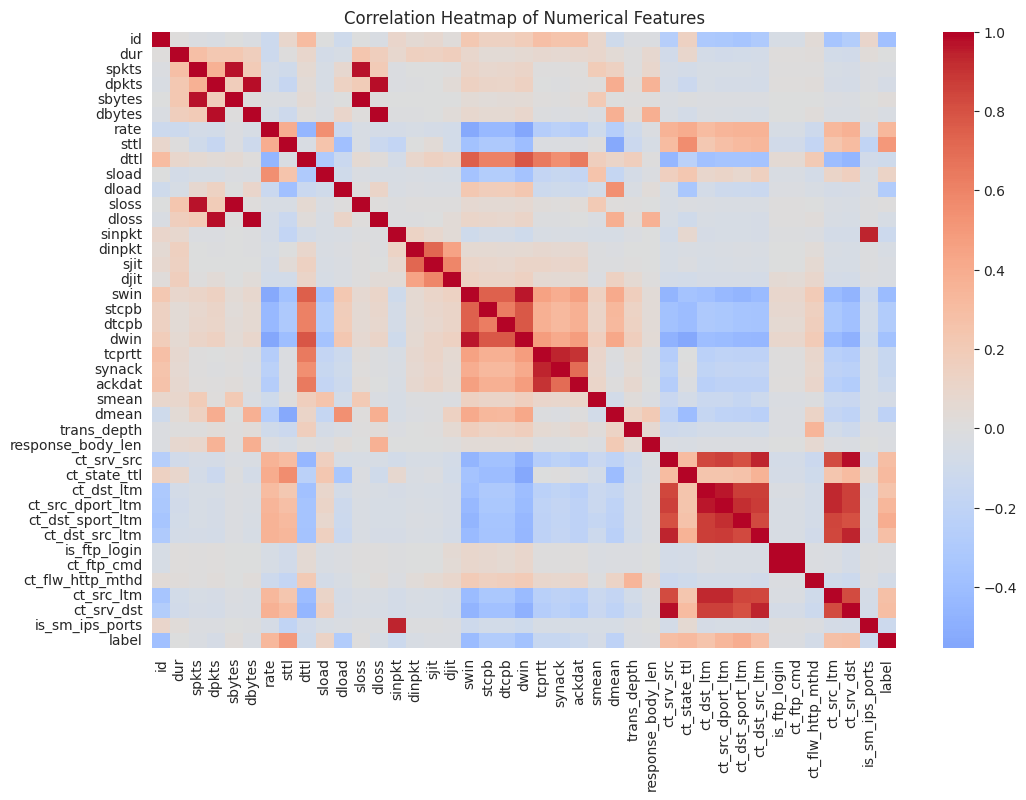

In [140]:
# 5. Correlation Analysis
# ======================
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

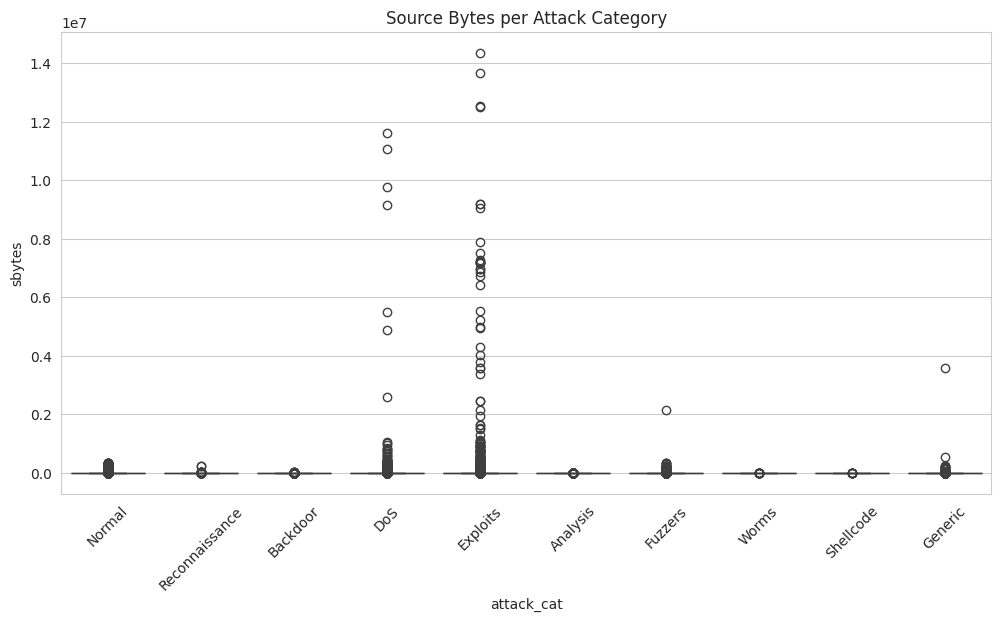

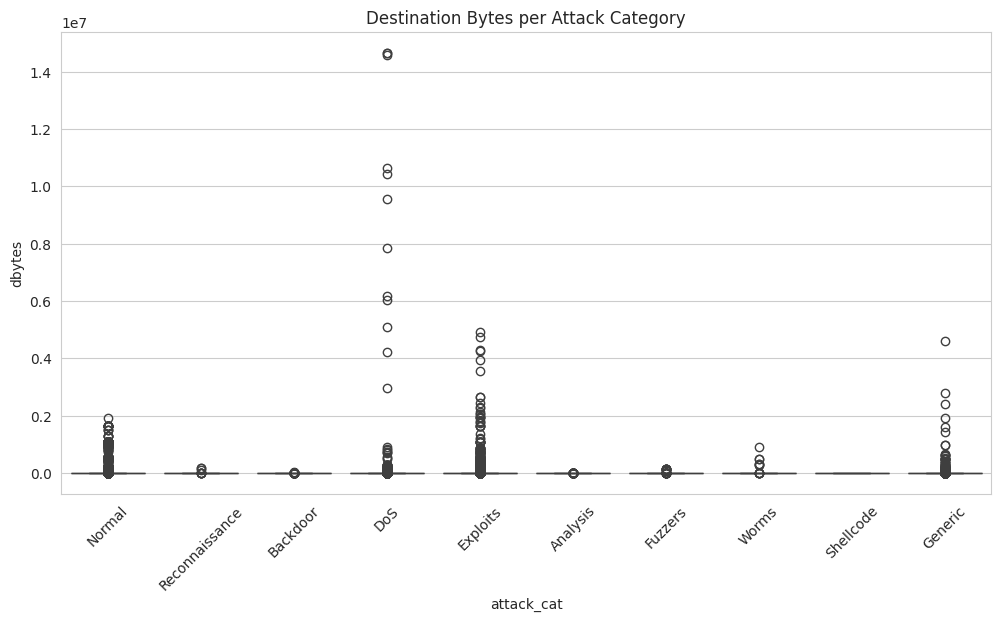

In [141]:
# 6. Attack Category vs Features (example)
# ======================
plt.figure(figsize=(12,6))
sns.boxplot(x='attack_cat', y='sbytes', data=df)
plt.xticks(rotation=45)
plt.title("Source Bytes per Attack Category")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='attack_cat', y='dbytes', data=df)
plt.xticks(rotation=45)
plt.title("Destination Bytes per Attack Category")
plt.show()